In [9]:
#series of tests to make sure evalf works

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from evalf import evalf

from scipy.integrate import odeint

%load_ext autoreload
%autoreload 2


def better_imshow(row_vals, col_vals, data, ax=None):
    #row_vals and col_vals are the data that was swept over
    assert len(row_vals) == data.shape[0], 'length of row_vals does not match shape of data'
    assert len(col_vals) == data.shape[1], 'length of col_vals does not match shape of data'
    if ax == None:
        plt.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')
    else:
        ax.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#todo: copy-paste below cells with diff parameters to test evalf makes sense

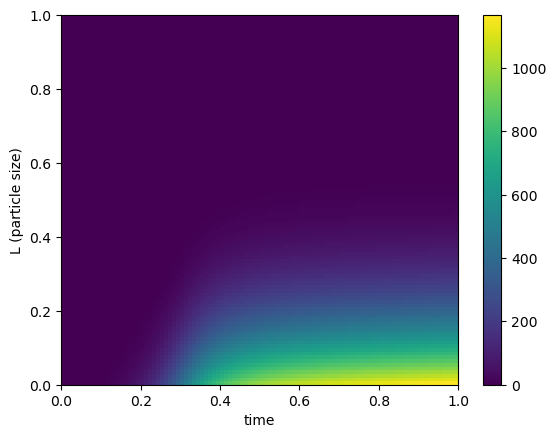

Text(0.5, 0, 't')

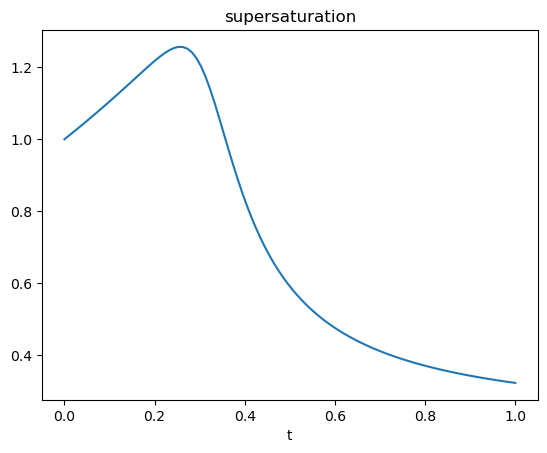

In [12]:
L_list = np.linspace(0,1, 100)
tlist = np.linspace(0,1,100) #units??


S = 1 #initial supersaturation
n = np.zeros_like(L_list) #initial population density distribution

#parameters
p = {"L_list" : L_list, #discretization bins
     'E' :  1, #evaporation rate
     'V' : 1, #solvent volume
     'rho' : 1, # density of the crystal
     'k_v' : 1, #goes in N_C, volumetric shape factor
     'k_g' : 1, #growth rate constant m/s
     'g' : 3, #power constant for growth
     'k_N' : 1, #nucleation rate constant 
     'alpha' :5, #power constant for nucleation
     }


#integrate the equations
x = np.hstack([S, n])
x_t = odeint(evalf, y0=x, t=tlist, args=(p,None))


#plot results
n_t = x_t[:,1:]
better_imshow(L_list, tlist, n_t.T)
plt.ylabel('L (particle size)')
plt.xlabel('time')
plt.colorbar()
plt.show()

plt.plot(tlist, x_t[:,0]) 
plt.title('supersaturation')
plt.xlabel('t')

In [11]:
L_list = np.linspace(0,1e-4, 100)
tlist = np.linspace(0,1e-4,100) #units??


S = 1 #initial supersaturation
n = np.zeros_like(L_list) #initial population density distribution

#parameters
p = {"L_list" : L_list, #discretization bins
     'E' :  1e-7, #evaporation rate
     'V' : 1e-3, #solvent volume
     'rho' : 1200, # density of the crystal
     'k_v' : 1, #goes in N_C, volumetric shape factor
     'k_g' : 1e10, #growth rate constant m/s
     'g' : 3, #power constant for growth
     'k_N' : 1e5, #nucleation rate constant 
     'alpha' :5, #power constant for nucleation
     }


#integrate the equations
x = np.hstack([S, n])
x_t = odeint(evalf, y0=x, t=tlist, args=(p,None))


#plot results
n_t = x_t[:,1:]
better_imshow(L_list, tlist, n_t.T)
plt.ylabel('L (particle size)')
plt.xlabel('time')
plt.colorbar()
plt.show()

plt.plot(tlist, x_t[:,0]) 
plt.title('supersaturation')
plt.xlabel('t')

KeyboardInterrupt: 